# Installing necessary libraries



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading

In [ ]:
# Loading the MNIST dataset using TensorFlow's Keras API
mnist = tf.keras.datasets.mnist

# Separating the dataset into training and testing sets
# x_train and x_test contain images of handwritten digits,
# while y_train and y_test contain corresponding digit labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization

1.   List item
2.   List item



In [ ]:
# Normalizing the pixel values of images in the training set (x_train)
# and testing set (x_test) along the specified axis (axis=1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Model

In [ ]:
# Creating a sequential model using TensorFlow's Keras API
model = tf.keras.models.Sequential()

# Flattening the input data (assuming it's a multi-dimensional array)
model.add(tf.keras.layers.Flatten())

# Adding two dense layers with ReLU activation functions
# The first dense layer has 128 units, and the second one also has 128 units
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Adding an output layer with 10 units (for digits 0 through 9) and softmax activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compiling the model with the Adam optimizer, sparse categorical crossentropy loss,
# and accuracy as the metric for evaluation during training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Trainning

In [ ]:
# Training the model on the training data (x_train) with corresponding labels (y_train)
# for a specified number of epochs (3 in this case)
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2629 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - accuracy: 0.9775


# Accuracy

In [ ]:
# Evaluating the trained model on the test data (x_test) with corresponding labels (y_test)
# and obtaining the validation loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

# Printing the accuracy of the model on the test data
print('Accuracy:', val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9697
Accuracy: 0.9696999788284302


# Inference

In [ ]:
# Making predictions using the trained model on the test data (x_test)
predictions = model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [ ]:
# Printing the index of the maximum predicted value in the second set of predictions
# This can be interpreted as the model's predicted digit for the second test example
print(np.argmax(predictions[2]))

1


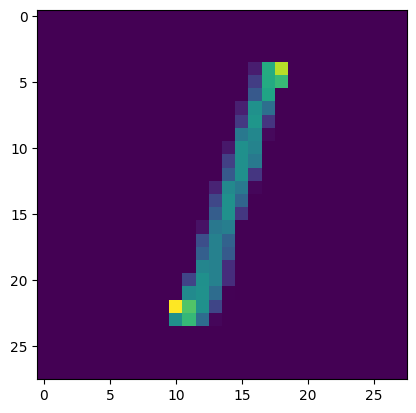

In [ ]:
# Displaying the image of the third test example (index 1) using matplotlib
plt.imshow(x_test[2])

# Showing the plotted image
plt.show()